# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting, based on measurements of contaminants collected over a year, whether it may be harmful to health or not.

- FECHA. Date recorded at the time of taking pollutant values (numeric)
- N_CCAA. Name of each autonomous community in Spain where measurement data for each pollutant has been collected (categorical)
- PROVINCIA. Name of each province where measurement data for each pollutant has been collected (categorical)
- N_MUNICIPIO. Name of each municipality where measurement data for each pollutant has been collected (categorical)
- ESTACION. Number assigned to each station of each autonomous community that has recorded pollutant measurement data (numeric)
- MAGNITUD. Each pollutant that has been recorded in the different stations (categorical)
- TIPO_AREA.Type of area in which they are located, urban, suburban or rural area (categorical).
- TIPO_ESTACION. According to the typology of the main emission source, traffic, industrial or background (categorical).
- LATITUD, LONGITUD. Geographic data of each station where the pollutants have been recorded (numeric)
- H01, H02, H03... H24. Recorded value per hour of each pollutant. All contaminants have been taken with unified measurement units (µg/m3)(numeric)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pickle import dump
import pickle
import sklearn

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/processed/Madrid_pollutants.csv')
df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-01,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.8,1.6,1.3,1.2,1.0,0.9,0.8,0.9,0.7,0.5,0.5,0.5,0.6,0.5,0.4,0.3,0.5,0.7,1.5,1.9,2.0,1.7,1.5
1,2022-01-02,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.2,1.2,1.0,0.9,0.9,0.8,0.8,0.8,1.0,0.7,0.7,0.6,0.6,0.4,0.5,0.8,0.5,0.9,1.2,1.5,1.9,1.2,1.6,1.5
2,2022-01-03,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.5,1.3,1.1,1.0,1.0,0.9,1.0,1.2,2.3,1.8,1.3,0.8,0.5,0.8,0.8,0.9,0.9,1.2,0.9,0.8,1.1,1.5,1.5,2.1
3,2022-01-04,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.6,1.5,1.6,1.5,1.4,3.5,3.1,1.1,1.2,1.2,1.2,0.8,0.7,0.8,0.6,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.3
4,2022-01-05,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.9,0.5,0.5,0.4,0.5,0.5,0.4,0.3,0.4,0.4,0.4,0.4,0.4,0.7,0.6,0.5


### **1. Define the target**

Calculate the daily average of the hourly columns

In [4]:
# List of columns from which you want to calculate the average
columns_h = [col for col in df.columns if col.startswith('H')]

# Calculate the average of these columns for each row
df['MEDIA_DIARIA'] = df[columns_h].mean(axis=1)

Classify the value of the daily average based on the hazardousness

In [5]:
# Function to classify the hazard values of each pollutant
def classify_hazard(value, thresholds):
    if value < thresholds['Low']:
        return 'Low'
    elif value < thresholds['High']:
        return 'Normal'
    else:
        return 'High'

# Apply the function to each row of the DataFrame
def classify_row(row):
    pollutant = row['MAGNITUD']
    value = row['MEDIA_DIARIA']
    if pollutant in thresholds_hazard:
        return classify_hazard(value, thresholds_hazard[pollutant])

#Define hazard thresholds for the 8 pollutants
thresholds_hazard = {
    'SO2': {'Low': 25, 'High': 40},
    'CO': {'Low': 2, 'High': 4},
    'C6H6': {'Low': 2, 'High': 5},
    'NO2': {'Low': 15, 'High': 25},
    'PM2.5': {'Low': 10, 'High': 15},
    'PM10': {'Low': 25, 'High': 45}, 
    'NOX': {'Low': 75, 'High': 100},
    'O3': {'Low': 75, 'High': 100}
}

# Create a new column with the hazard classification
df['PELIGROSIDAD'] = df.apply(classify_row, axis=1)

df.head(3)

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24,MEDIA_DIARIA,PELIGROSIDAD
0,2022-01-01,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.8,1.8,1.6,1.3,1.2,1.0,0.9,0.8,0.9,0.7,0.5,0.5,0.5,0.6,0.5,0.4,0.3,0.5,0.7,1.5,1.9,2.0,1.7,1.5,1.045833,Low
1,2022-01-02,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.2,1.2,1.0,0.9,0.9,0.8,0.8,0.8,1.0,0.7,0.7,0.6,0.6,0.4,0.5,0.8,0.5,0.9,1.2,1.5,1.9,1.2,1.6,1.5,0.966667,Low
2,2022-01-03,MADRID,MADRID,ALCOBENDAS,4,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.5,1.3,1.1,1.0,1.0,0.9,1.0,1.2,2.3,1.8,1.3,0.8,0.5,0.8,0.8,0.9,0.9,1.2,0.9,0.8,1.1,1.5,1.5,2.1,1.175000,Low


In [6]:
# Group by 'Danger' and obtain statistics for 'magnitude'.
stats_magnitud = df.groupby('PELIGROSIDAD')['MAGNITUD'].describe()
stats_magnitud

,count,unique,top,freq
PELIGROSIDAD,,,,
High,7365,4,NO2,5583
Low,36360,8,PM10,8162
Normal,10206,5,NO2,4111


In [7]:
columns_h = [column for column in df.columns if 'H' in column]
df = df.drop(columns_h, axis=1)

In [8]:
df.drop(['ESTACION', 'N_CCAA', 'PROVINCIA'], axis = 1, inplace= True)

In [9]:
df.to_csv('../data/processed/clean_madrid.csv', index= False)

In [10]:
madrid_df = pd.read_csv('../data/processed/clean_madrid.csv')

In [11]:
madrid_df

,N_MUNICIPIO,MAGNITUD,TIPO_AREA,TIPO_ESTACION,LATITUD,LONGITUD,MEDIA_DIARIA,PELIGROSIDAD
0,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.045833,Low
1,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.966667,Low
2,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.175000,Low
3,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,1.087500,Low
4,ALCOBENDAS,C6H6,URBANA,TRAFICO,40.54035,-3.64525,0.429167,Low
...,...,...,...,...,...,...,...,...
53926,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.250000,Low
53927,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.791667,Low
53928,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,2.875000,Low
53929,VILLA DEL PRADO,SO2,RURAL,FONDO,40.24790,-4.27520,3.000000,Low


### **2. Analysis of univariate variables**

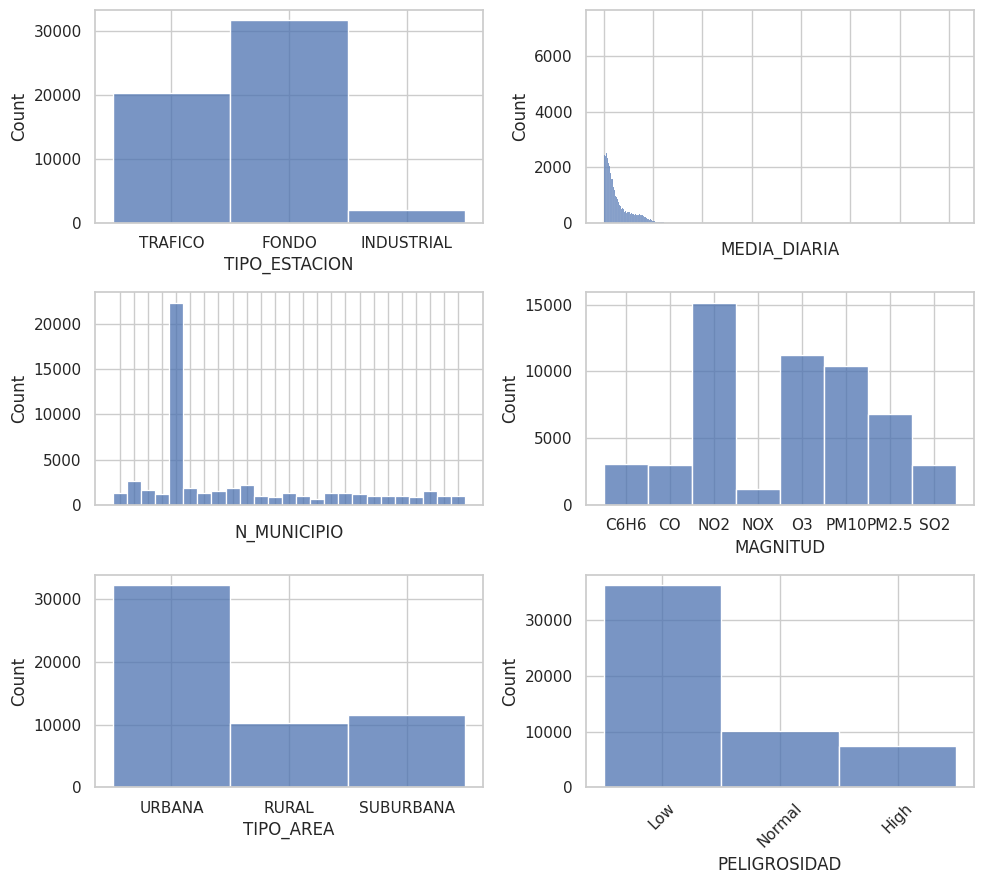

In [12]:
sns.set(style= 'whitegrid')

fig, axis = plt.subplots(3, 2, figsize=(10, 9))

# Histograms
sns.histplot(ax=axis[0, 0], data=madrid_df, x= 'TIPO_ESTACION')
sns.histplot(ax=axis[0, 1], data=madrid_df, x= 'MEDIA_DIARIA').set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=madrid_df, x= 'N_MUNICIPIO').set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=madrid_df, x= 'MAGNITUD')
sns.histplot(ax=axis[2, 0], data=madrid_df, x= 'TIPO_AREA')
sns.histplot(ax=axis[2, 1], data=madrid_df, x= 'PELIGROSIDAD')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- El primer gráfico muestra la peligrosidad por tipo de estación, que son tráfico, fondo o industrial. El tipo de estación que tiene más casos con una peligrosidad baja es el tráfico, lo que puede indicar que la contaminación del aire en las zonas de tráfico es menor de lo esperado.

- El segundo gráfico muestra la media diaria de la peligrosidad, que es el promedio de los valores de peligrosidad de cada día. La media diaria disminuye a medida que avanza el tiempo, lo que puede indicar que la contaminación del aire se ha reducido en el periodo analizado.

- El tercer gráfico muestra la peligrosidad por número de municipio, que es un código numérico que identifica a cada municipio. Hay una gran variación entre los municipios, algunos tienen una peligrosidad baja, otros una normal y otros una alta. Esto puede indicar que la contaminación del aire depende de factores locales, como la ubicación, el clima, la actividad económica, etc.

- El cuarto gráfico muestra la peligrosidad por magnitud, que es el tipo de contaminante que se mide. Hay ocho magnitudes: C6H6, CO, NO2, NOx, O3, PM10, PM2.5 y SO2. Las magnitudes que tienen más casos con una peligrosidad baja son el NO2 y el NOx, que son contaminantes que provienen principalmente de la combustión de los vehículos. Las magnitudes que tienen más casos con una peligrosidad alta son el C6H6 y el SO2, que son contaminantes que provienen principalmente de fuentes industriales.

- El quinto gráfico muestra la peligrosidad por tipo de área, que puede ser urbana, rural o suburbana. El tipo de área que tiene más casos con una peligrosidad baja es la urbana, lo que puede indicar que la contaminación del aire en las ciudades es menor de lo esperado. El tipo de área que tiene más casos con una peligrosidad alta es la rural, lo que puede indicar que la contaminación del aire en las zonas rurales es mayor de lo esperado.

- El sexto gráfico muestra la peligrosidad en general, sin distinguir por ninguna otra variable. La mayoría de los casos tienen una peligrosidad baja, lo que puede indicar que la contaminación del aire no es un problema grave en el conjunto de los datos. Sin embargo, hay algunos casos con una peligrosidad normal o alta, lo que puede indicar que hay situaciones o lugares donde la contaminación del aire es un riesgo para la salud y el medio ambiente.

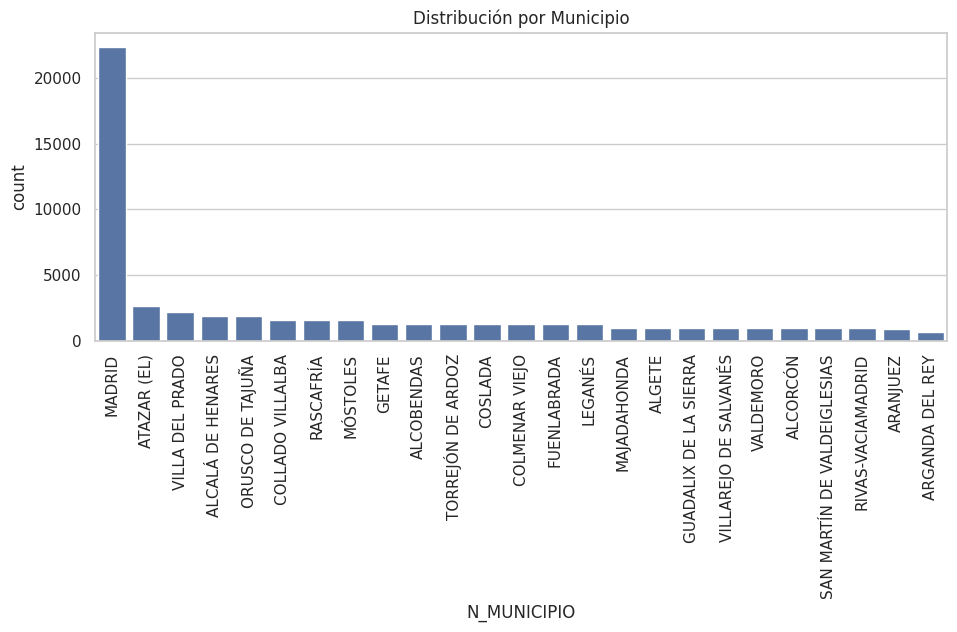

In [13]:
# Data distribution in the column 'N_MUNICIPALITY', with municipalities sorted by frequency in descending order on the x-axis. 

sns.set(style="whitegrid")

plt.figure(figsize=(11, 4))

sns.countplot(data=madrid_df, x='N_MUNICIPIO', order = madrid_df['N_MUNICIPIO'].value_counts().index)

plt.title('Distribución por Municipio')
plt.xticks(rotation=90)
plt.show()

- El municipio de la Comunidad de Madrid que mayor número de instancias tiene en nuestros datos es Madrid.

### **3. Analysis multivariate**

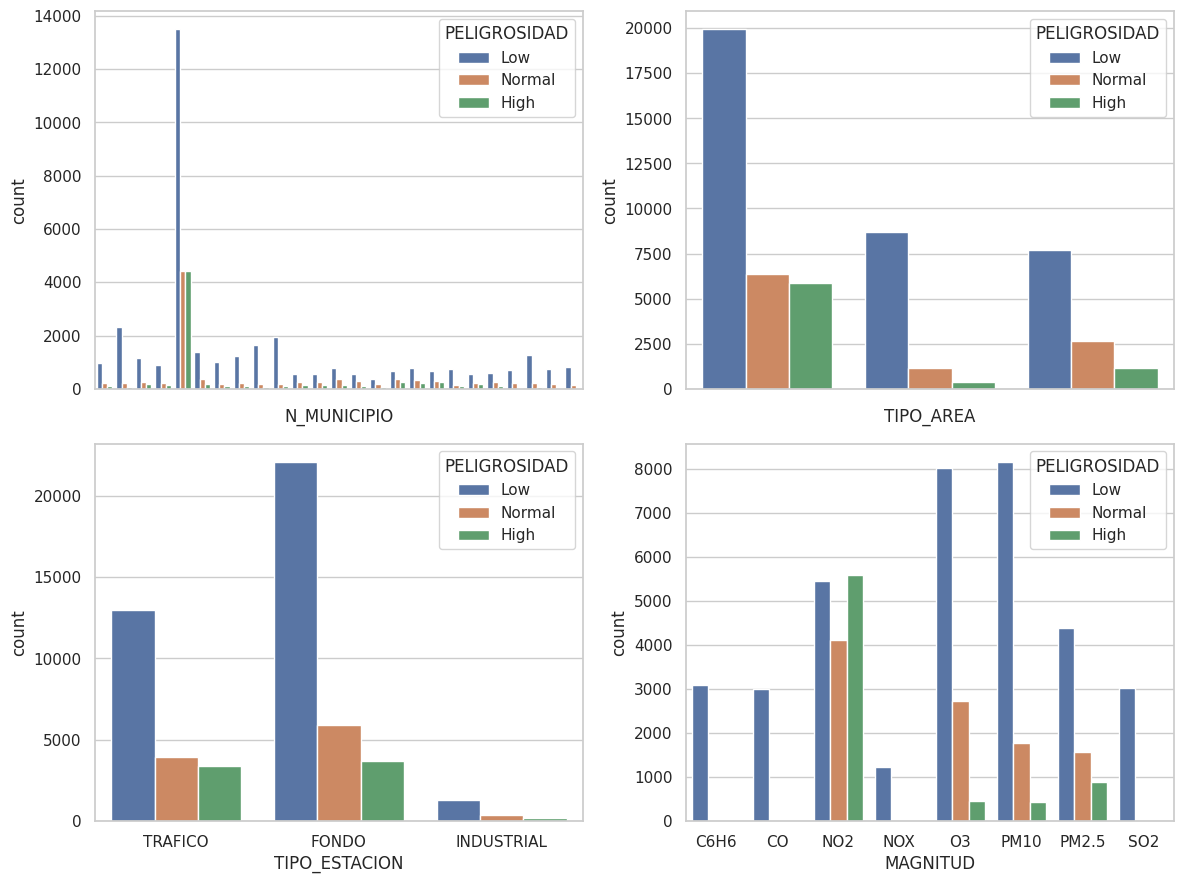

In [14]:
# Categorical-categorical analysis
fig, axis = plt.subplots(2, 2, figsize = (12, 9))

sns.countplot(ax = axis[0, 0], data = madrid_df, x = 'N_MUNICIPIO', hue = 'PELIGROSIDAD').set_xticklabels([])
sns.countplot(ax = axis[0, 1], data = madrid_df, x = 'TIPO_AREA', hue = 'PELIGROSIDAD').set_xticklabels([])
sns.countplot(ax = axis[1, 0], data = madrid_df, x = 'TIPO_ESTACION', hue = 'PELIGROSIDAD')
sns.countplot(ax = axis[1, 1], data = madrid_df, x = 'MAGNITUD', hue = 'PELIGROSIDAD')

plt.tight_layout()
plt.show()

- En el primer gráfico, se puede ver que la mayoría de los municipios tienen una peligrosidad baja, excepto algunos que tienen una peligrosidad normal o alta. Esto significa que la contaminación del aire no es un problema grave en la mayoría de los municipios, pero hay algunos que requieren más atención y medidas de prevención.

- En el segundo gráfico, se puede ver que hay un tipo de área que tiene una cuenta muy alta con una peligrosidad baja. Esto significa que este tipo de área tiene una baja exposición a la contaminación del aire, lo que puede deberse a su ubicación geográfica, su clima, su vegetación, etc.

- En el tercer gráfico, se puede ver que el tipo de estación que tiene una cuenta más alta con una peligrosidad baja es el tráfico. Esto significa que las estaciones que miden la contaminación del aire en las zonas de tráfico tienen una baja incidencia de contaminantes que suponen un riesgo para la salud y el medio ambiente. Esto puede deberse a que el tráfico se ha reducido por el uso de vehículos eléctricos, el transporte público, la bicicleta, etc.

- En el cuarto gráfico, se puede ver que las magnitudes que tienen las cuentas más altas con una peligrosidad baja o normal son el NO2 y el OX. Estas magnitudes corresponden al dióxido de nitrógeno y al óxido nítrico, que son contaminantes que se originan principalmente por la combustión de los motores de los vehículos. Esto puede deberse a que se han implementado normas más estrictas para limitar las emisiones de estos contaminantes, o a que se han usado combustibles más limpios o renovables.


In [15]:
madrid_df.columns

Index(['N_MUNICIPIO', 'MAGNITUD', 'TIPO_AREA', 'TIPO_ESTACION', 'LATITUD',
       'LONGITUD', 'MEDIA_DIARIA', 'PELIGROSIDAD'],
      dtype='object')

In [16]:
# List of columns to factor
factorize_col = ['N_MUNICIPIO', 'MAGNITUD', 'TIPO_AREA', 'TIPO_ESTACION', 'PELIGROSIDAD']

# Dictionary to store the correspondences for each column
correspondences = {}

for col in factorize_col:
    labels, unique = pd.factorize(madrid_df[col])

    # Update the DataFrame with the factored column
    madrid_df[col + '_N'] = labels

    # Store the correspondence in the dictionary using a range to represent each single value
    correspondences[col] = dict(zip(unique, range(len(unique))))

# Check DataFrame to confirm changes
madrid_df.drop(factorize_col, axis= 1, inplace= True)

In [17]:
# View the mappings for a column, e.g. 'N_CCAA'.
print("Correspondences for 'MAGNITUD':", correspondences['MAGNITUD'])

Correspondences for 'MAGNITUD': {'C6H6': 0, 'CO': 1, 'NO2': 2, 'NOX': 3, 'O3': 4, 'PM10': 5, 'PM2.5': 6, 'SO2': 7}


In [18]:
# Save the dictionary in a .pk file
with open('../data/interim/factorize_values/facto_madrid.pk', 'wb') as file:
    pickle.dump(correspondences, file)

In [19]:
madrid_df.to_csv('../data/processed/factorize_csv/madrid_fct.csv', index= False)

In [20]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53931 entries, 0 to 53930
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LATITUD          53931 non-null  float64
 1   LONGITUD         53931 non-null  float64
 2   MEDIA_DIARIA     53931 non-null  float64
 3   N_MUNICIPIO_N    53931 non-null  int64  
 4   MAGNITUD_N       53931 non-null  int64  
 5   TIPO_AREA_N      53931 non-null  int64  
 6   TIPO_ESTACION_N  53931 non-null  int64  
 7   PELIGROSIDAD_N   53931 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.3 MB


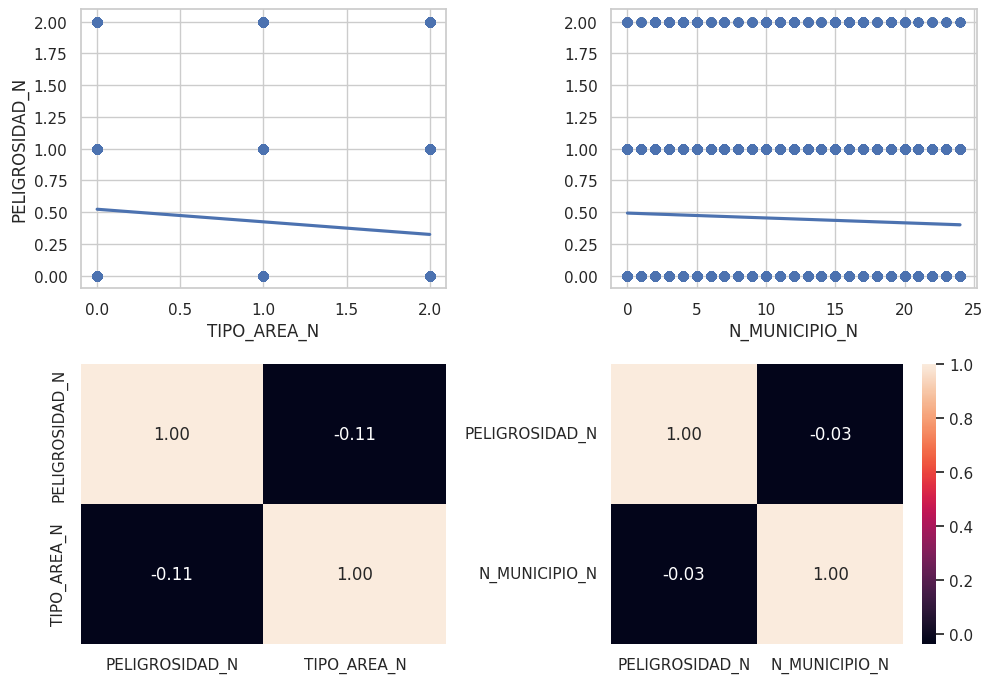

In [21]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = madrid_df, x = 'TIPO_AREA_N', y = 'PELIGROSIDAD_N')
sns.heatmap(madrid_df[['PELIGROSIDAD_N', 'TIPO_AREA_N']].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = madrid_df, x = 'N_MUNICIPIO_N', y = 'PELIGROSIDAD_N').set(ylabel=None)
sns.heatmap(madrid_df[['PELIGROSIDAD_N', 'N_MUNICIPIO_N']].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

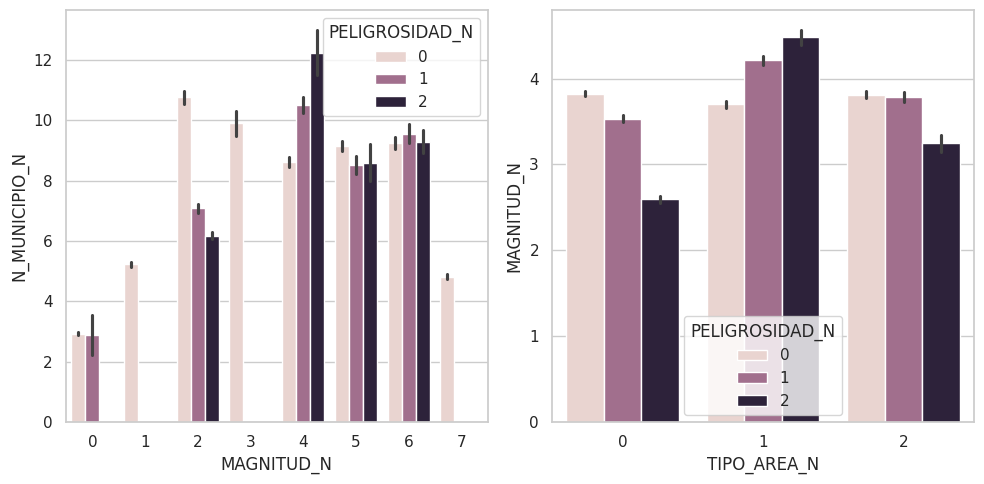

In [22]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = madrid_df, x = 'MAGNITUD_N', y = 'N_MUNICIPIO_N', hue = 'PELIGROSIDAD_N')
sns.barplot(ax = axis[1], data = madrid_df, x = 'TIPO_AREA_N', y = 'MAGNITUD_N', hue = 'PELIGROSIDAD_N')

plt.tight_layout()

plt.show()

Se observa que la peligrosidad de la contaminación del aire varía según el tipo de contaminante y el tipo de área. Los gráficos de barras muestran la distribución de los niveles de peligrosidad por cada categoría de magnitud, municipio y área.

**En el gráfico de la izquierda, se puede ver que:**

- El contaminante con mayor nivel de peligrosidad es el C6H6 (benceno), que tiene un valor de MAGNITUD_N de 0. La mayoría de los municipios tienen un nivel de peligrosidad de 1 o 2 para este contaminante, lo que indica un riesgo alto para la salud y el medio ambiente.

- El contaminante con menor nivel de peligrosidad es el CO (monóxido de carbono), que tiene un valor de MAGNITUD_N de 1. La mayoría de los municipios tienen un nivel de peligrosidad de 0 para este contaminante, lo que indica un riesgo bajo para la salud y el medio ambiente.

- Los demás contaminantes tienen niveles de peligrosidad variados, dependiendo del municipio. 

**En el gráfico de la derecha, se puede ver que:**

- El tipo de área con mayor nivel de peligrosidad es el urbano, que tiene un valor de TIPO_AREA_N de 0. La mayoría de los contaminantes tienen un nivel de peligrosidad de 1 o 2 en este tipo de área, lo que indica una mayor exposición a la contaminación del aire en las ciudades.

- El tipo de área con menor nivel de peligrosidad es el rural, que tiene un valor de TIPO_AREA_N de 2. La mayoría de los contaminantes tienen un nivel de peligrosidad de 0 en este tipo de área, lo que indica una menor exposición a la contaminación del aire en las zonas rurales.

- El tipo de área suburbano, que tiene un valor de TIPO_AREA_N de 1, tiene niveles de peligrosidad intermedios, dependiendo del contaminante.

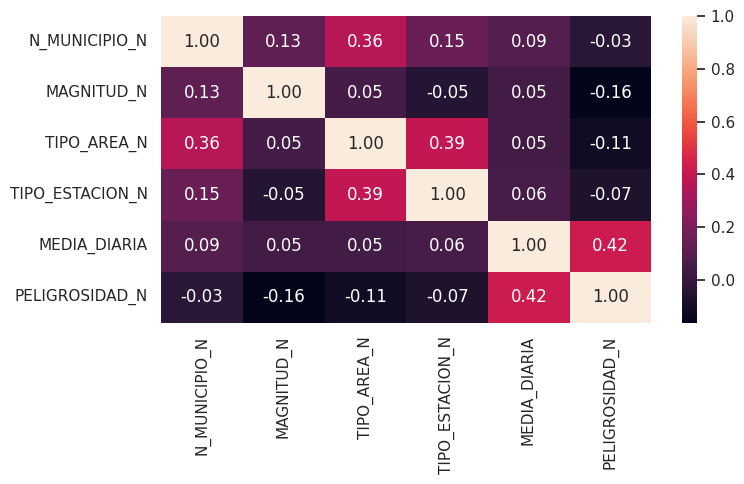

In [23]:
# Correlation map
fig, axis = plt.subplots(figsize = (8, 5))
sns.heatmap(madrid_df[['N_MUNICIPIO_N', 'MAGNITUD_N', 'TIPO_AREA_N', 'TIPO_ESTACION_N', 'MEDIA_DIARIA', 'PELIGROSIDAD_N']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- La variable que tiene mayor correlación positiva con PELIGROSIDAD_N es MEDIA_DIARIA, con un coeficiente de 0.42.

    Esto significa que a mayor valor de la media diaria del contaminante, mayor es el nivel de peligrosidad de la contaminación del aire.

- La variable que tiene mayor correlación positiva con TIPO_ESTACION_N es TIPO_AREA_N, con un coeficiente de 0.39.

    Esto significa que hay una relación entre el tipo de área y el tipo de estación donde se mide la contaminación del aire.

- La variable que tiene menor correlación con todas las demás es N_MUNICIPIO_N, con coeficientes entre -0.03 y 0.13.
    
    Esto significa que el número de municipio no tiene mucha influencia en las demás variables.

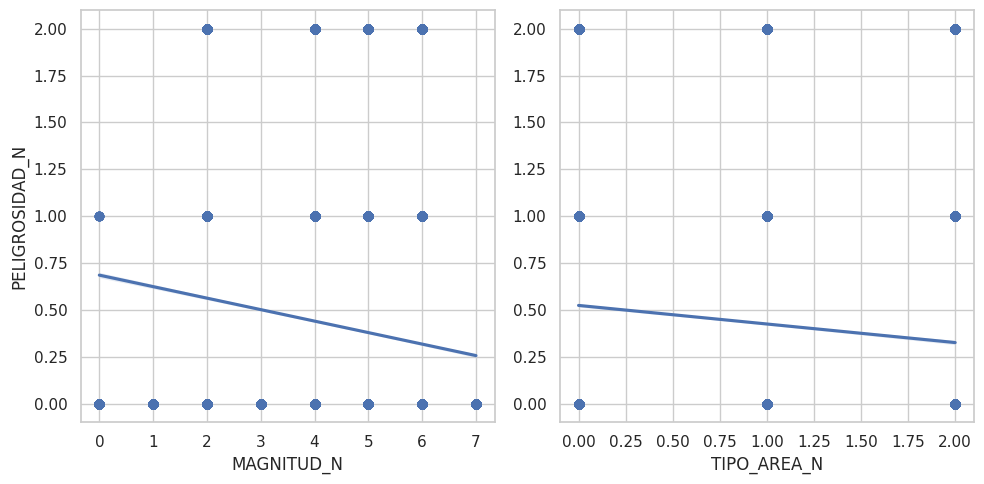

In [24]:
# 
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = madrid_df, x = 'MAGNITUD_N', y = 'PELIGROSIDAD_N')
sns.regplot(ax = axis[1], data = madrid_df, x = 'TIPO_AREA_N', y = 'PELIGROSIDAD_N').set(ylabel = None)

plt.tight_layout()

plt.show()

- La peligrosidad disminuye a medida que aumenta el valor de MAGNITUD_N, que representa el tipo de contaminante.

    Esto se debe a que los contaminantes con valores más altos de MAGNITUD_N tienen umbrales más altos de peligrosidad que los contaminantes con valores más bajos de MAGNITUD_N. Por ejemplo, el CO (monóxido de carbono) tiene un valor de MAGNITUD_N de 1 y un umbral alto de peligrosidad de 4 mg/m3, mientras que el C6H6 (benceno) tiene un valor de MAGNITUD_N de 0 y un umbral alto de peligrosidad de 5 µg/m3.

- La peligrosidad también disminuye a medida que aumenta el valor de TIPO_AREA_N, que representa el tipo de área donde se mide la contaminación.
    
    Esto se debe a que las áreas urbanas tienen mayor exposición a la contaminación del aire que las áreas rurales o suburbanas, debido al mayor tráfico y actividad industrial. Por ejemplo, el valor de TIPO_AREA_N es 0 para las áreas urbanas, 1 para las suburbanas y 2 para las rurales.

### **4. Feature engineering**
**Outliers analysis**

In [25]:
madrid_df.describe()

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,PELIGROSIDAD_N
count,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000,53931.000000
mean,40.446810,-3.694519,23.964349,8.059966,3.631733,0.616751,0.658897,0.462369
std,0.175136,0.227024,26.505437,6.521695,1.907187,0.814704,0.543885,0.722302
min,40.033270,-4.398100,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.341900,-3.754500,5.333333,4.000000,2.000000,0.000000,0.000000,0.000000
50%,40.421670,-3.689720,14.833333,4.000000,4.000000,0.000000,1.000000,0.000000
75%,40.479330,-3.580560,33.666667,12.000000,5.000000,1.000000,1.000000,1.000000
max,40.909000,-3.221100,715.083333,24.000000,7.000000,2.000000,2.000000,2.000000


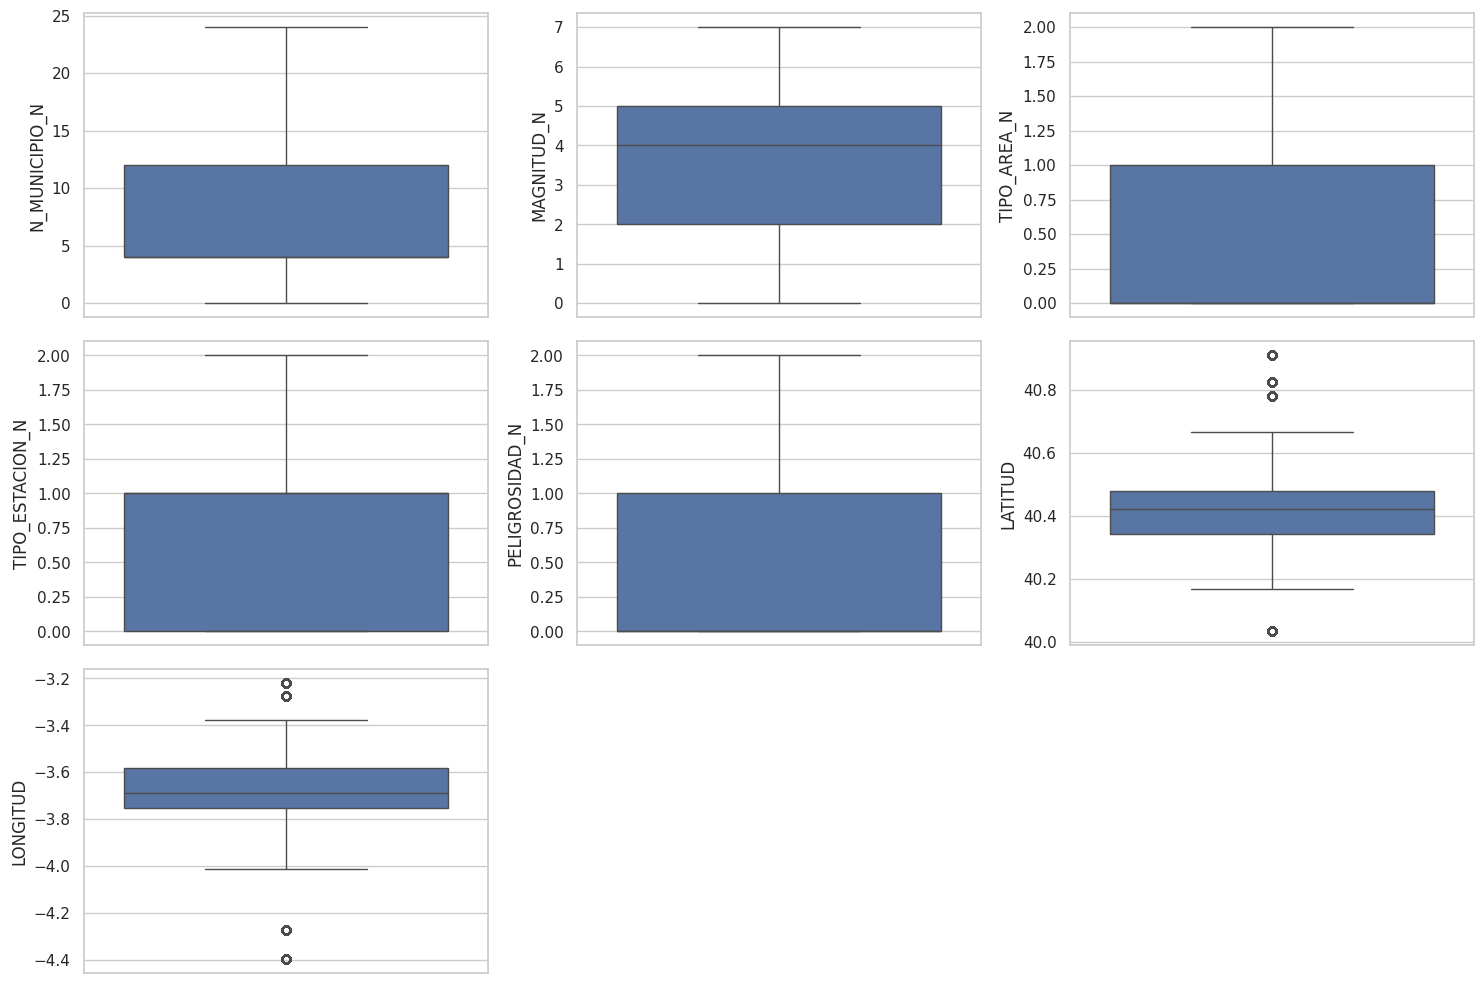

In [26]:
columns = ['N_MUNICIPIO_N', 'MAGNITUD_N', 'TIPO_AREA_N', 'TIPO_ESTACION_N', 'PELIGROSIDAD_N', 'LATITUD', 'LONGITUD']

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterate on each axis and the corresponding column.
for i in range(3):
    for j in range(3):
        # Calculates the index of the column based on i and j
        idx = i * 3 + j
        # If the index is less than the number of columns, draw the boxplot.
        if idx < len(columns):
            sns.boxplot(ax=axes[i, j], data=madrid_df, y=columns[idx])
        # If not, remove the axis
        else:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

**Really don't have to remove outliers, so leave the dataset the same.**

In [27]:
madrid_df[madrid_df['PELIGROSIDAD_N'] == 1]

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,PELIGROSIDAD_N
665,40.6339,-4.01425,2.175000,2,0,0,0,1
666,40.6339,-4.01425,2.045833,2,0,0,0,1
679,40.6339,-4.01425,2.179167,2,0,0,0,1
680,40.6339,-4.01425,2.120833,2,0,0,0,1
704,40.6339,-4.01425,2.062500,2,0,0,0,1
...,...,...,...,...,...,...,...,...
50905,40.1672,-3.27660,11.541667,13,6,2,0,1
50906,40.1672,-3.27660,14.166667,13,6,2,0,1
50907,40.1672,-3.27660,13.333333,13,6,2,0,1
50910,40.1672,-3.27660,13.333333,13,6,2,0,1


### **5. Feature scaling**

- Split the data in train and test.


In [28]:
from sklearn.model_selection import train_test_split

# Divide dataset into train and test

X = madrid_df.drop('PELIGROSIDAD_N', axis =1)
y = madrid_df['PELIGROSIDAD_N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 23)

X_train.to_csv('../data/processed/train_test/Xtrain.csv', index=False)
X_test.to_csv('../data/processed/train_test/Xtest.csv', index=False)
y_train.to_csv('../data/processed/train_test/ytrain.csv', index=False, header=['PELIGROSIDAD_N'])
y_test.to_csv('../data/processed/train_test/ytest.csv', index=False, header=['PELIGROSIDAD_N'])

In [29]:
y_train

5258     0
50100    2
994      0
38239    0
50677    0
        ..
9704     1
11190    0
26569    0
9256     0
41555    0
Name: PELIGROSIDAD_N, Length: 37751, dtype: int64

In [30]:
X_train

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
5258,40.32420,-3.87677,0.587500,7,1,2,1
50100,40.18524,-3.68027,19.041667,10,6,2,1
994,40.63390,-4.01425,1.454167,2,0,0,0
38239,40.42000,-3.74917,21.166667,4,5,2,1
50677,40.16720,-3.27660,7.791667,13,6,2,0
...,...,...,...,...,...,...,...
9704,40.37278,-3.61194,23.041667,4,2,0,1
11190,40.59970,-3.50330,7.791667,20,2,2,1
26569,40.44000,-3.63917,68.916667,4,4,0,1
9256,40.59970,-3.50330,9.333333,20,2,2,1


- Scaling the data.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_df.to_csv('../data/processed/scaled_train/scaled_X_train.csv', index=False)
X_test_scaled_df.to_csv('../data/processed/scaled_train/scaled_X_test.csv', index=False)